In [1]:
#Importing all the libraries needed for data analysis,transformation and model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style = 'darkgrid', palette ='viridis')
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('Titanic_train.csv')
train_df

test_df = pd.read_csv('Titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data Exploration and cleaning

In [3]:
train_df.describe() # Gives the statistical summary of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

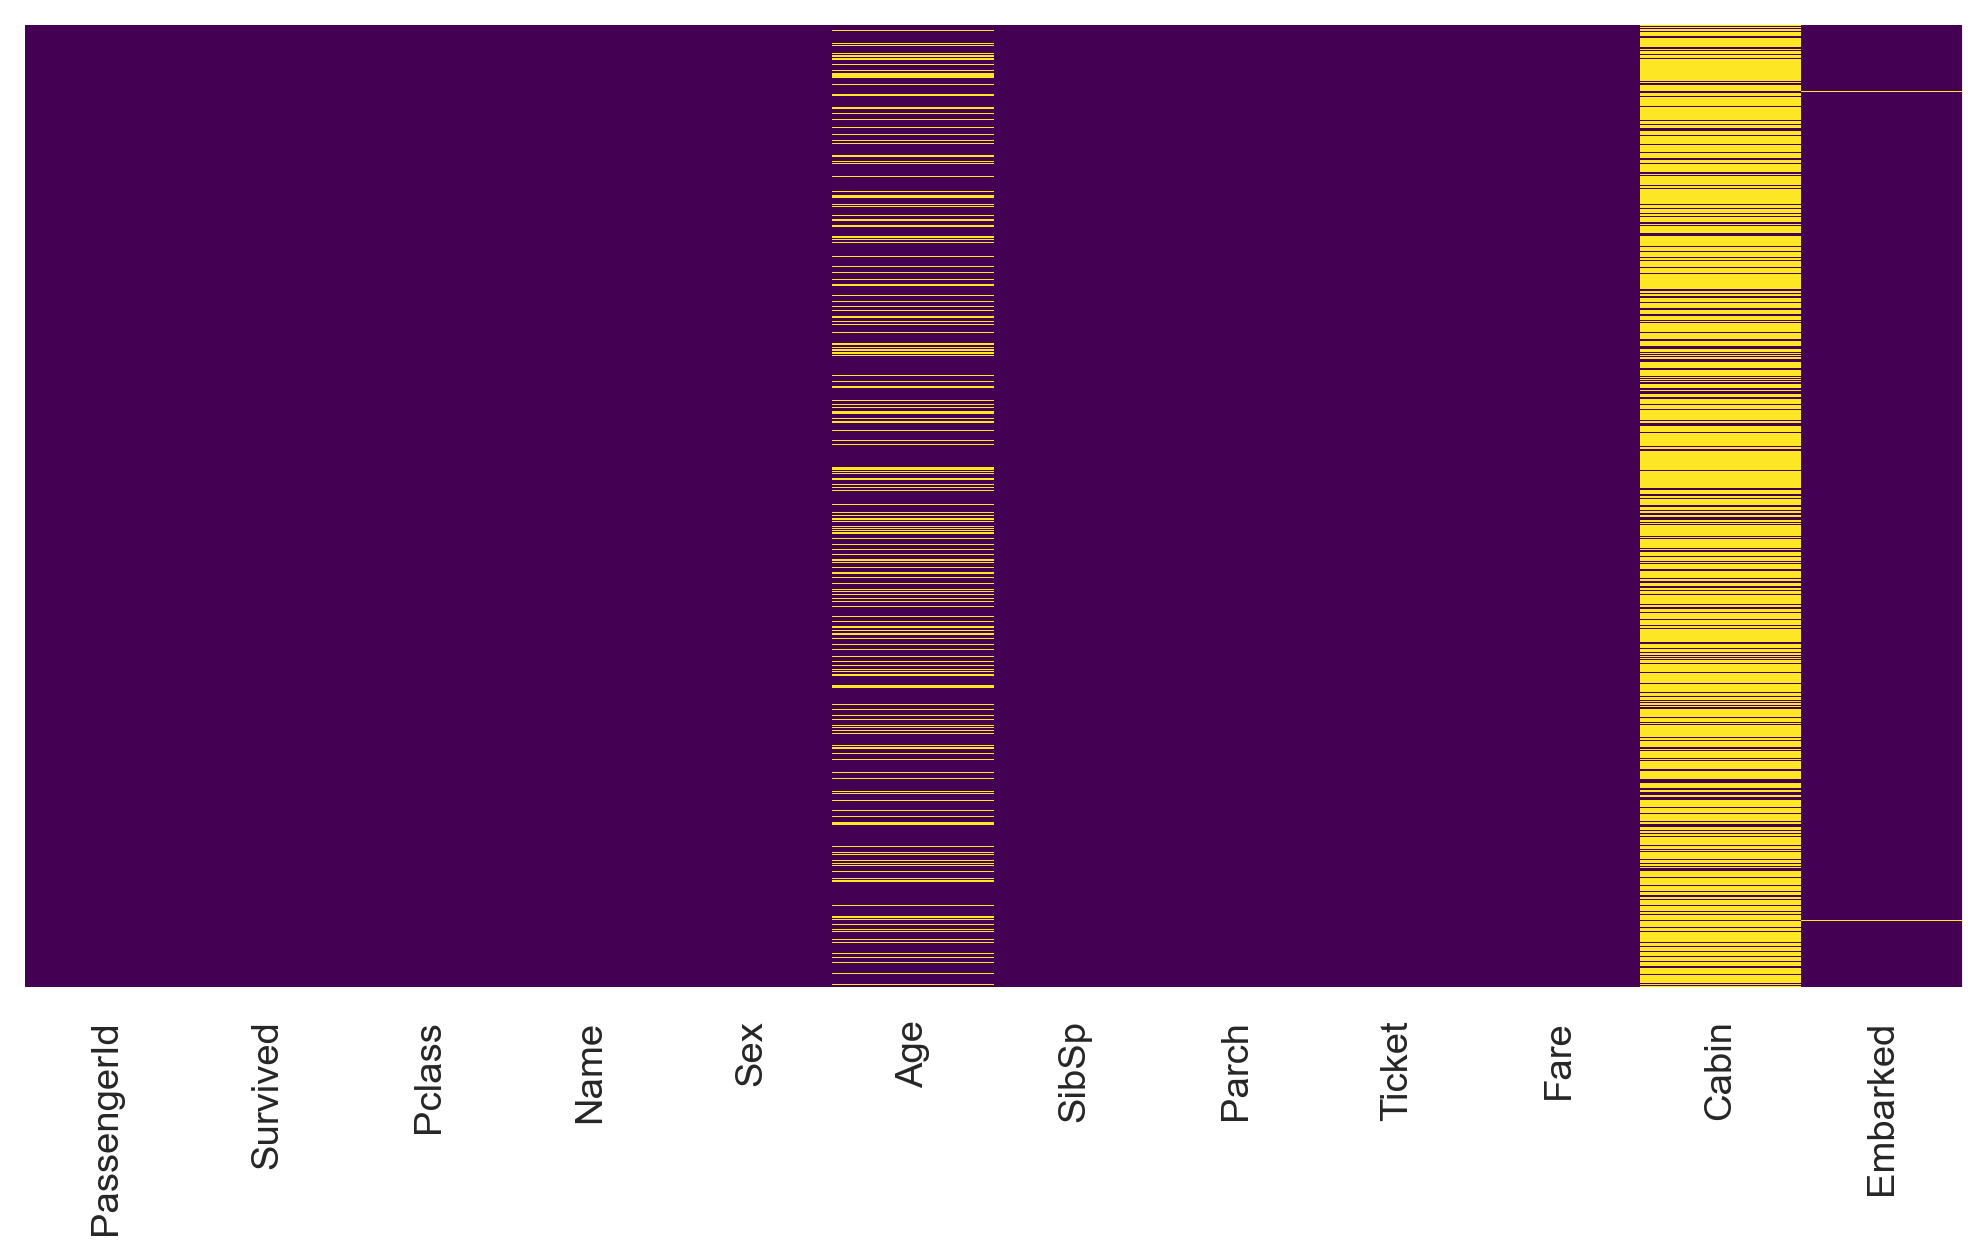

In [6]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<Axes: >

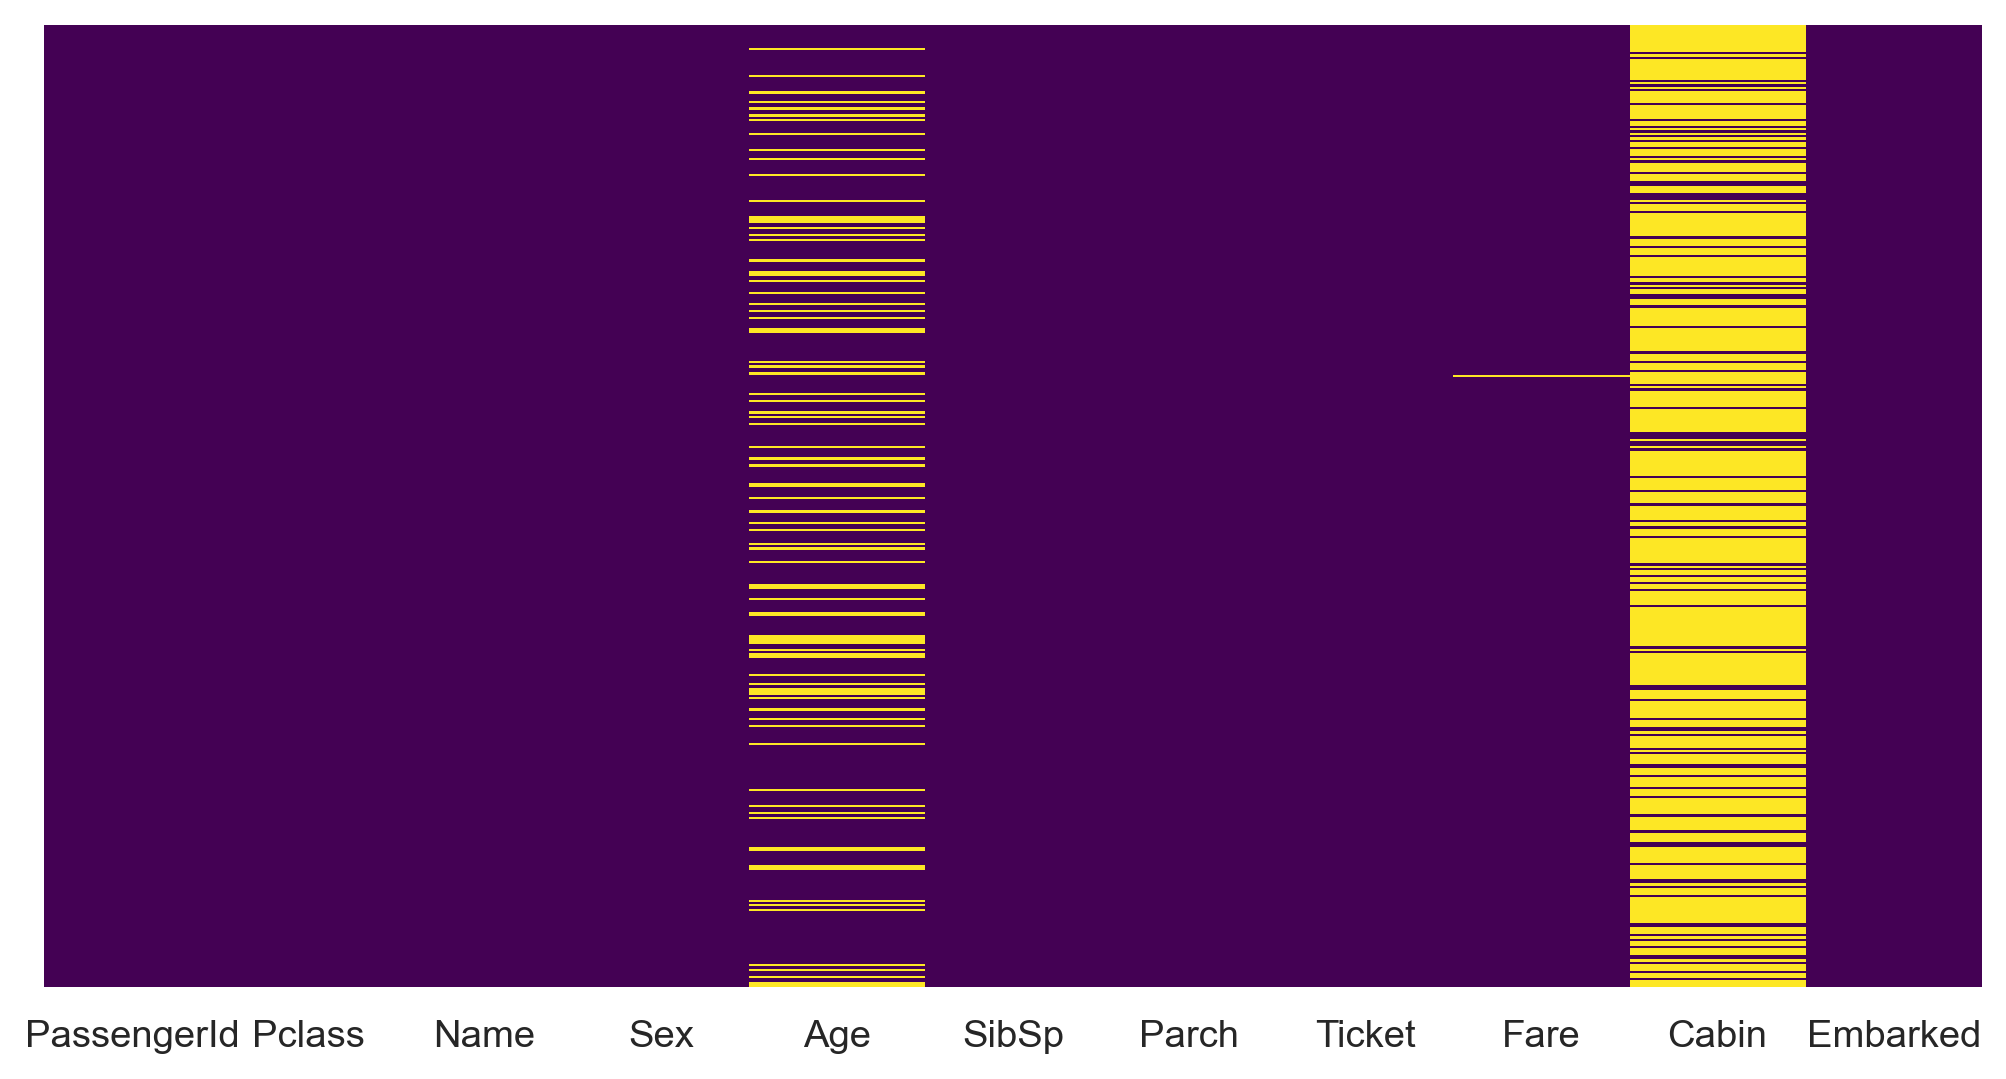

In [7]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

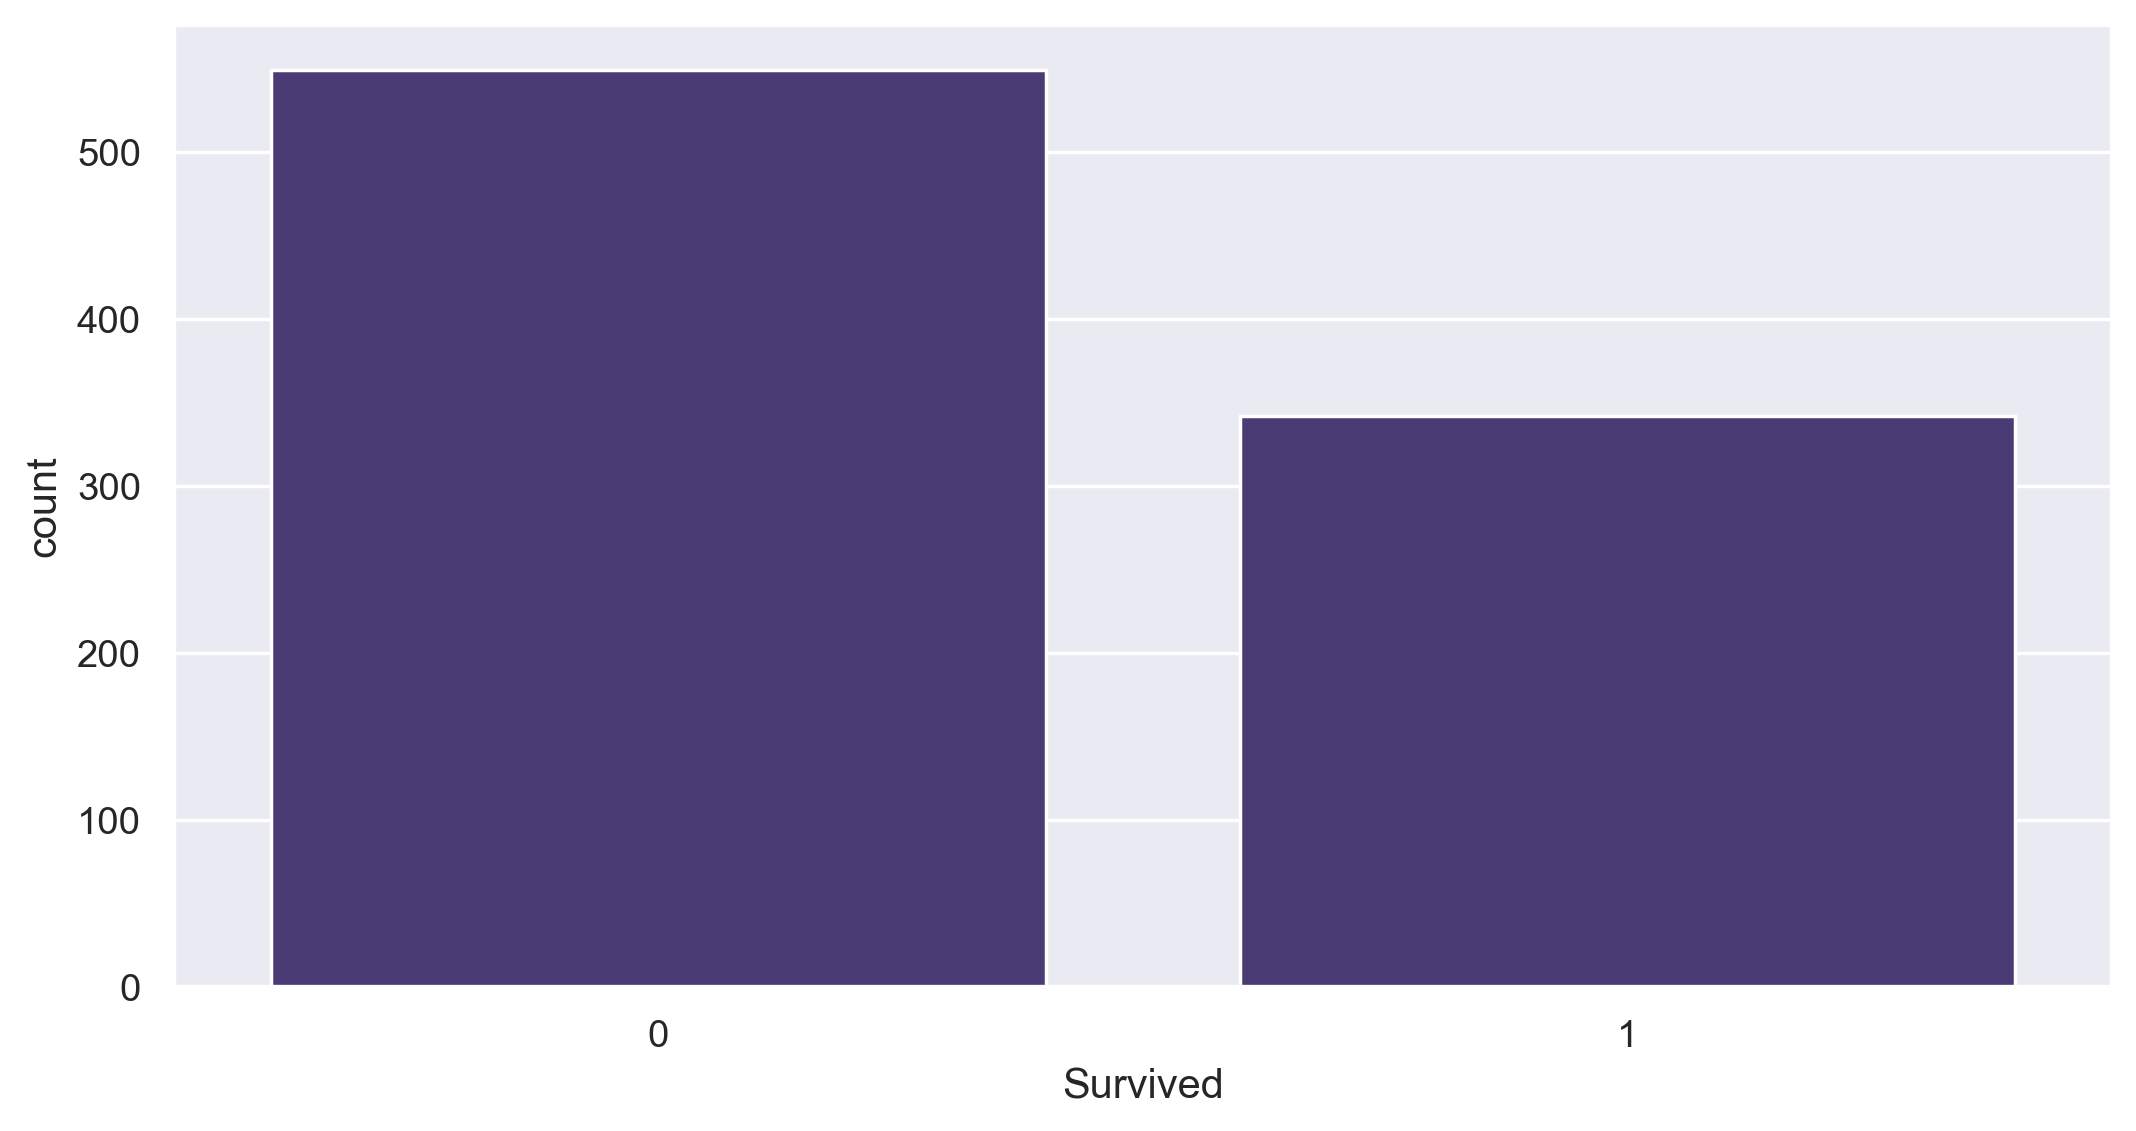

In [8]:
sns.countplot(x = 'Survived', data = train_df)

<Axes: xlabel='Survived', ylabel='count'>

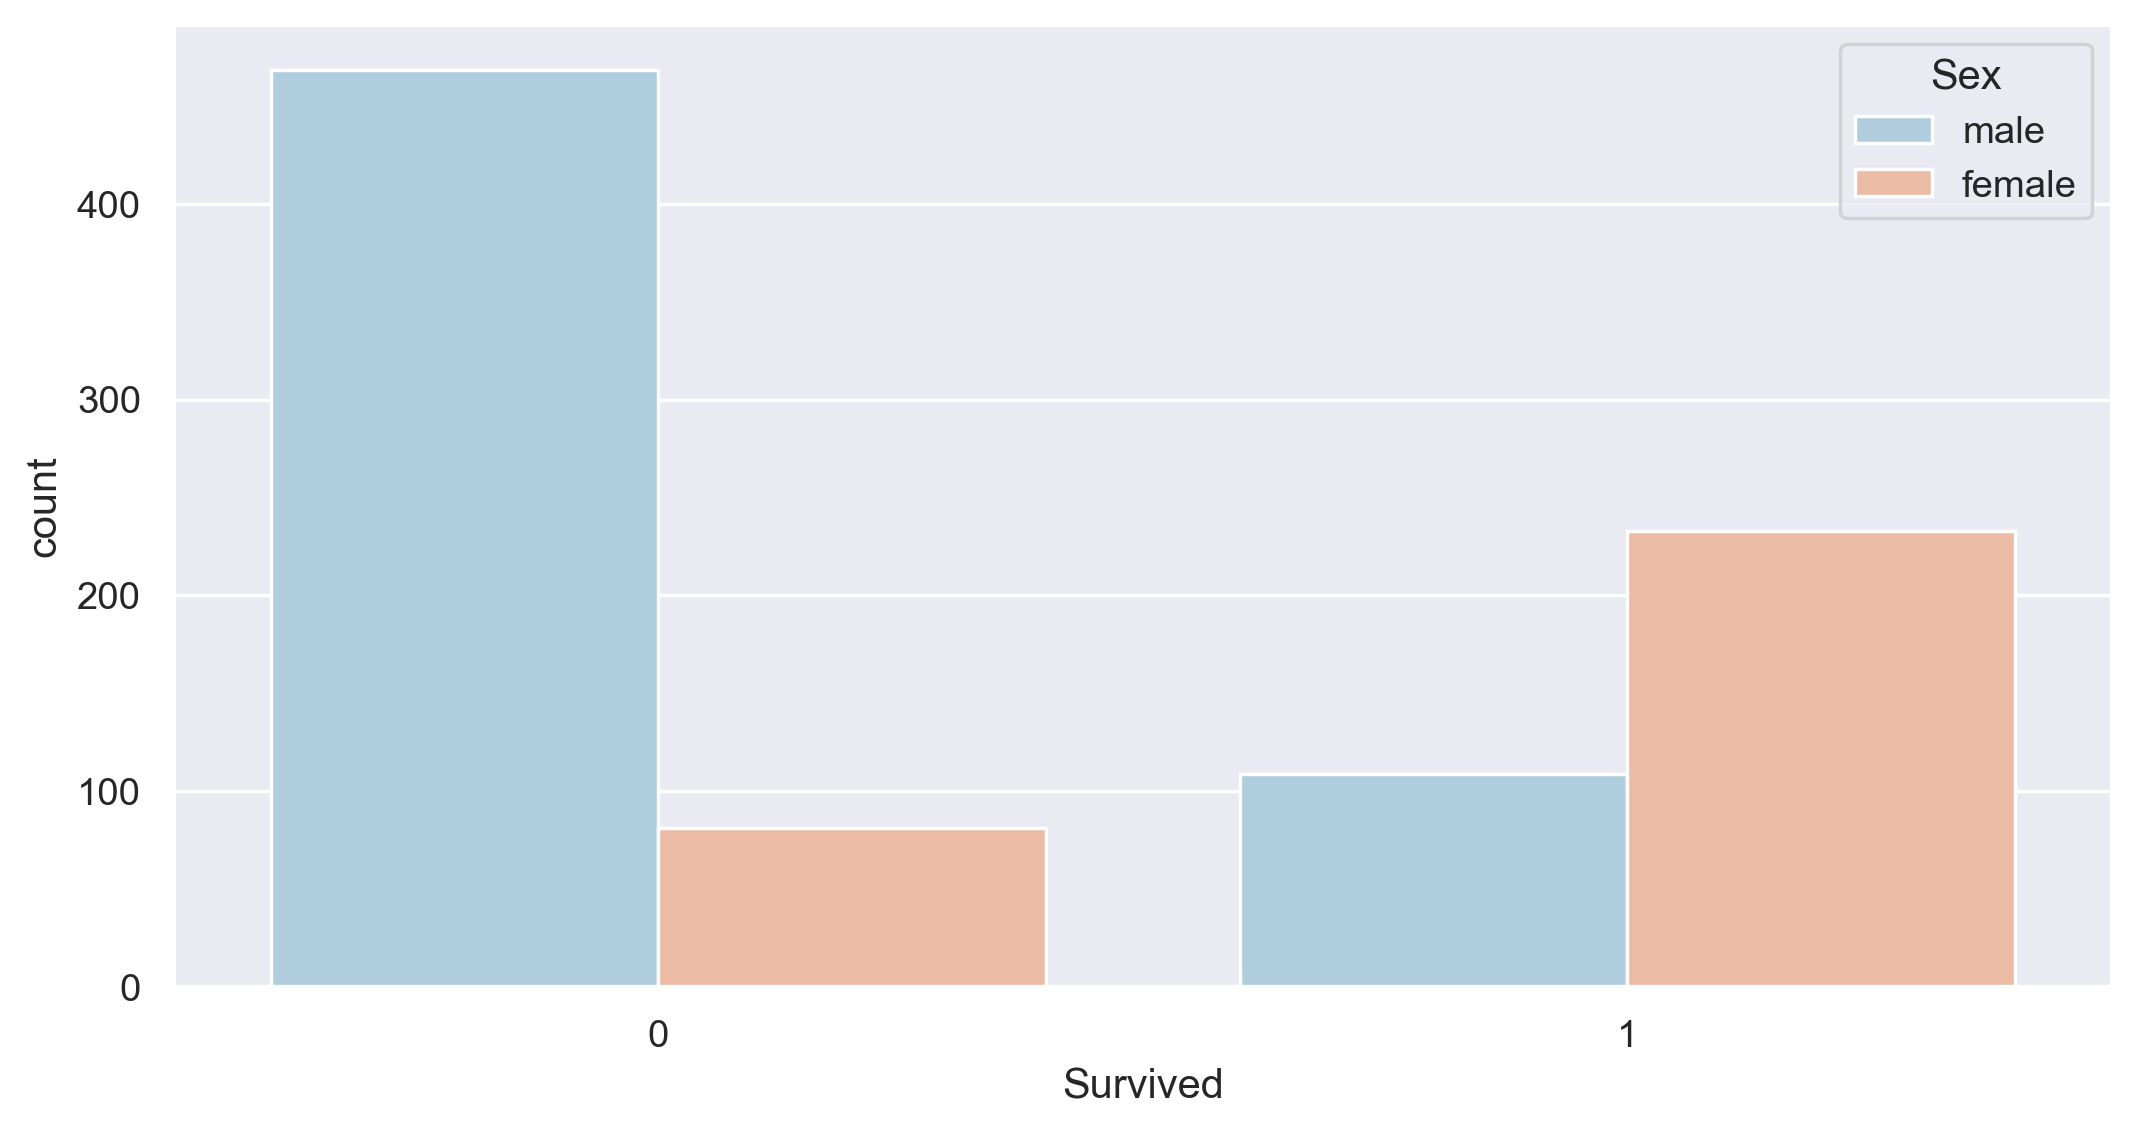

In [9]:
sns.countplot(x = 'Survived', data = train_df, hue = 'Sex' , palette = 'RdBu_r')

<Axes: xlabel='Pclass', ylabel='Age'>

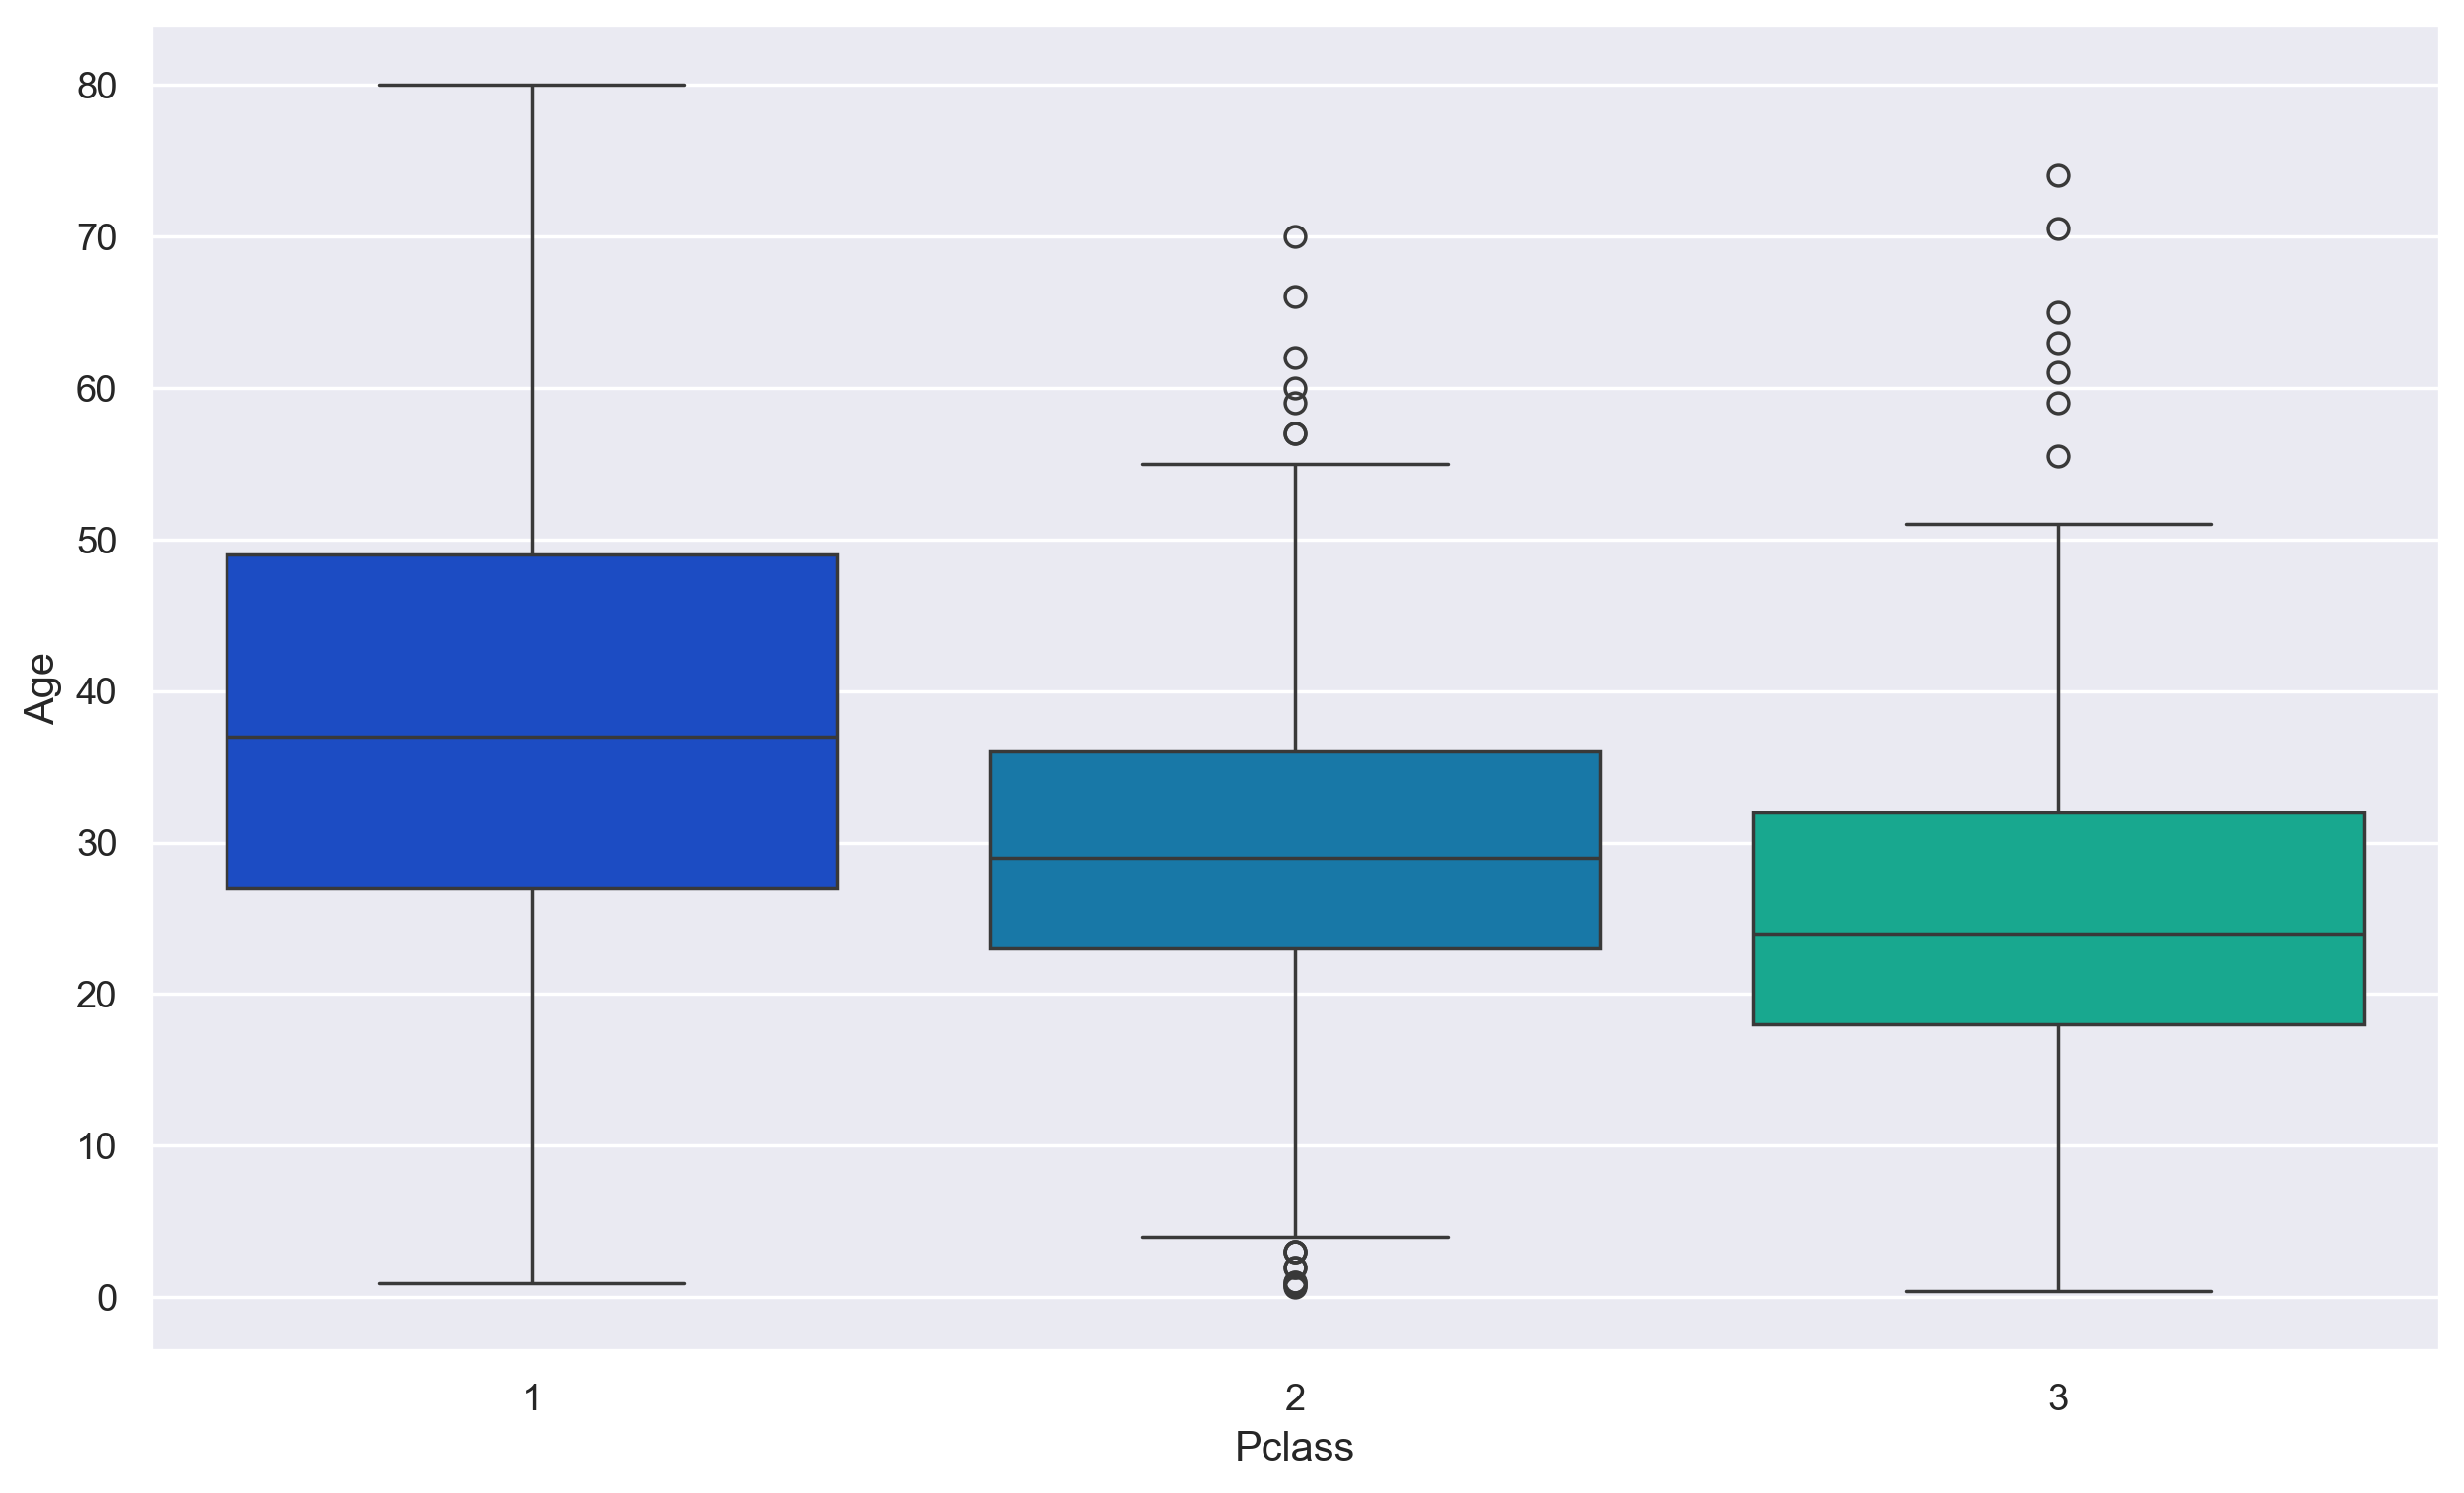

In [10]:
plt.figure(figsize = (12,7))
sns.boxplot(x= 'Pclass', y = 'Age', data = train_df, palette = 'winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

<Axes: xlabel='Pclass', ylabel='Age'>

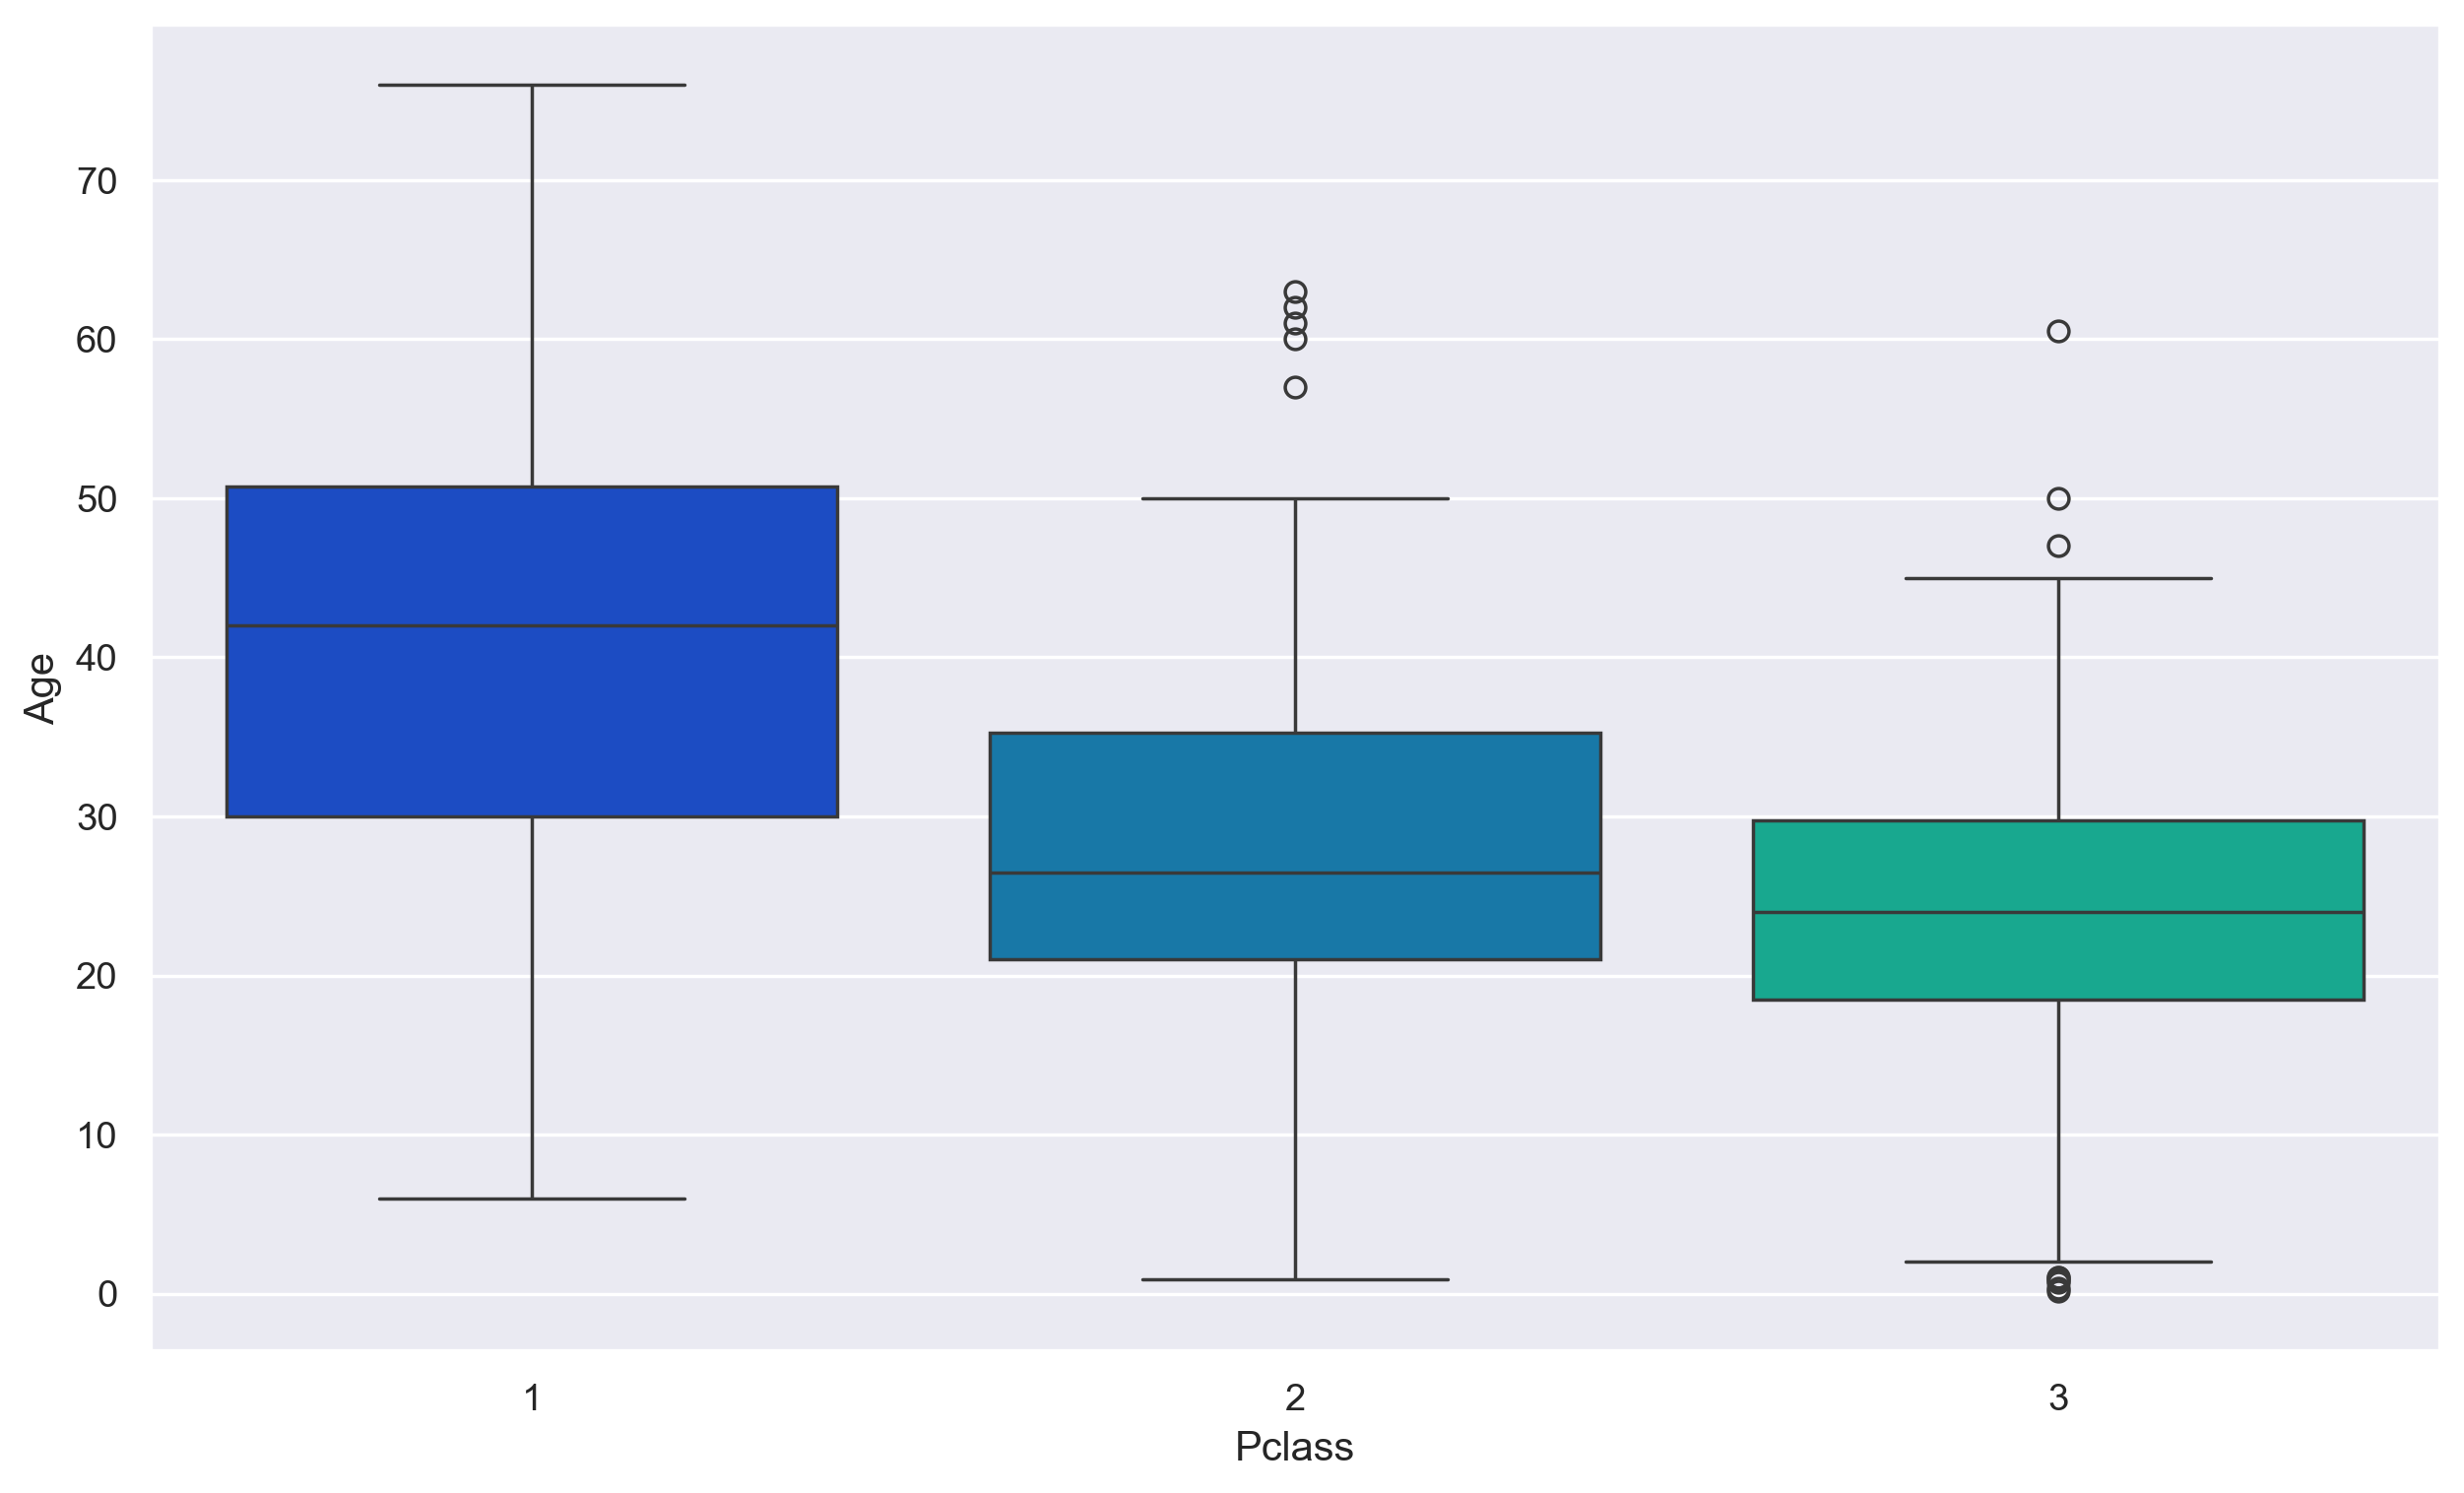

In [12]:
plt.figure(figsize = (12,7))
sns.boxplot(x= 'Pclass', y = 'Age', data = test_df, palette = 'winter')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age , axis = 1)
train_df
test_df['Age'] = test_df[['Age', 'Pclass']].apply(impute_age , axis = 1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


<Axes: >

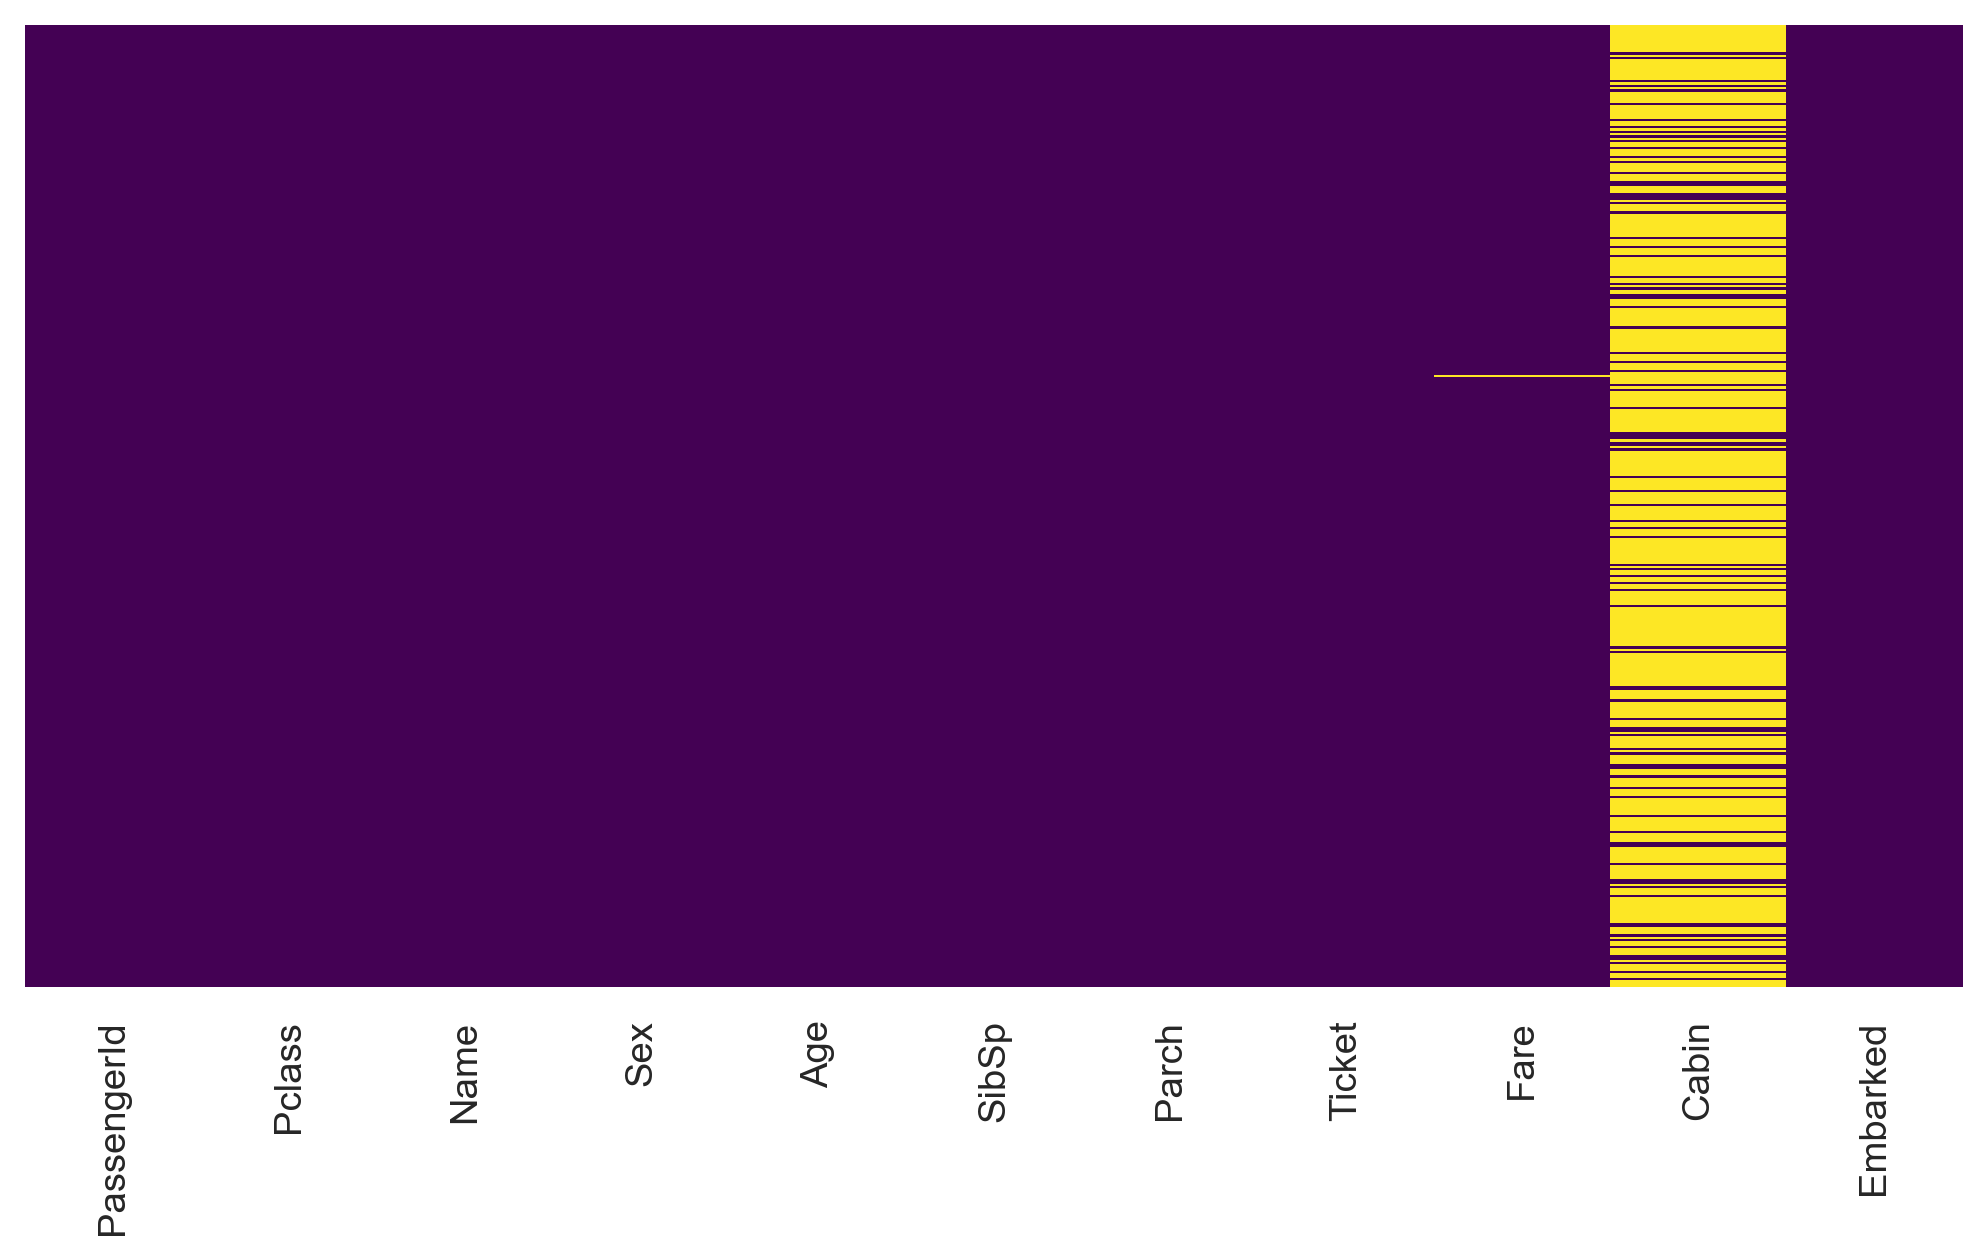

In [15]:
sns.heatmap(train_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')
sns.heatmap(test_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

In [16]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


### As the percentage of missing value of Cabin record is more than 50% it is wise to drop the column rather than imputing these many values


In [17]:
train_df.drop('Cabin', axis=1, inplace= True)
test_df.drop('Cabin', axis=1, inplace= True)

<Axes: >

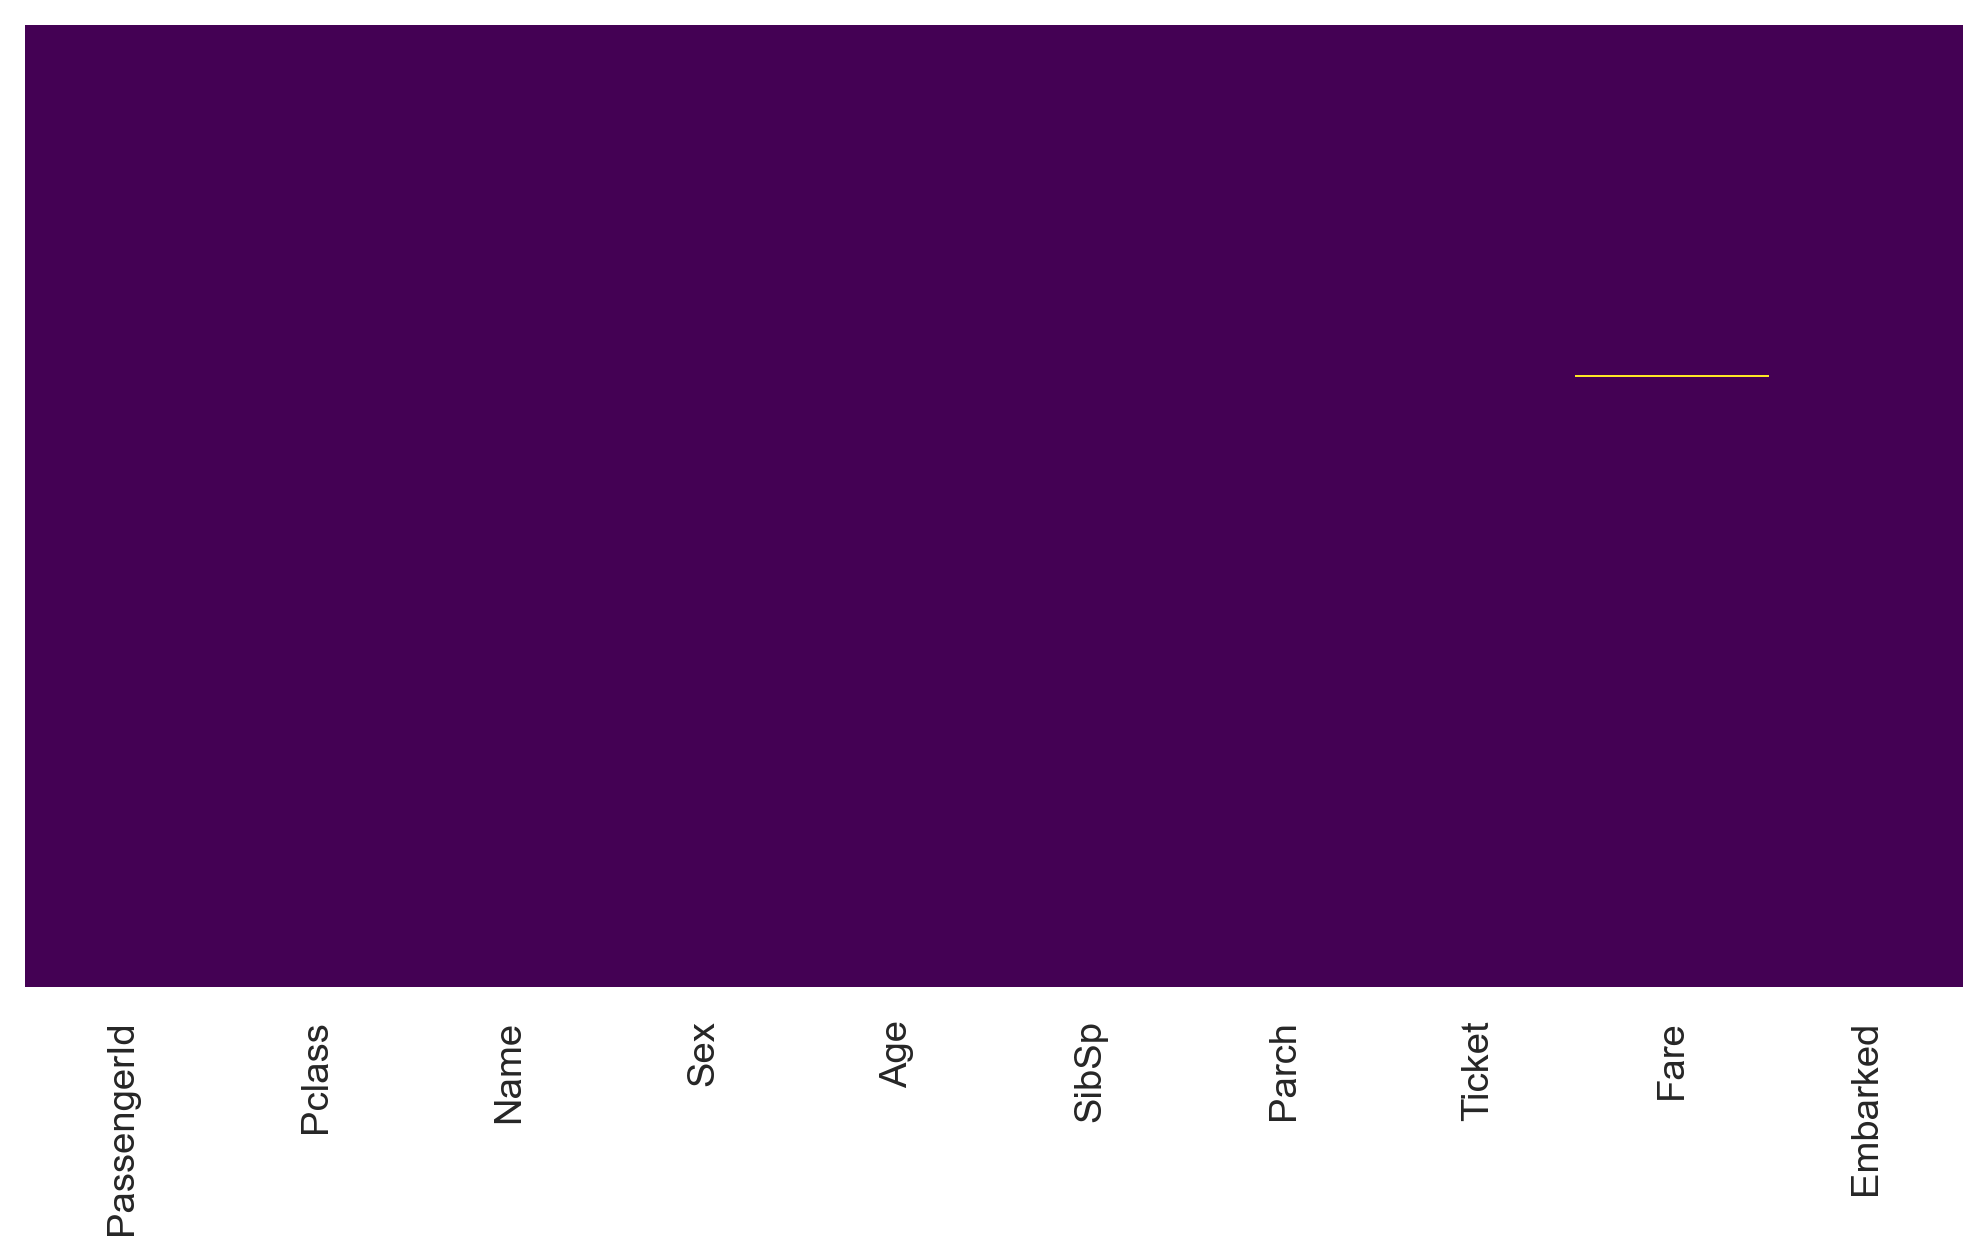

In [18]:
sns.heatmap(train_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')
sns.heatmap(test_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

In [19]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 0.22%


### As the percentage of missing value of Embarked column is the minimum we can impute it by the mode of the column.

In [20]:
train_df['Embarked'].fillna(train_df['Embarked'].mode, inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode, inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mode, inplace=True)

In [21]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Now the columns which are irrelevant for model building.

In [22]:
train_df = train_df.drop(columns = ['PassengerId', 'Name', 'Ticket'])
test_df = test_df.drop(columns = ['PassengerId', 'Name', 'Ticket'])

In [23]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

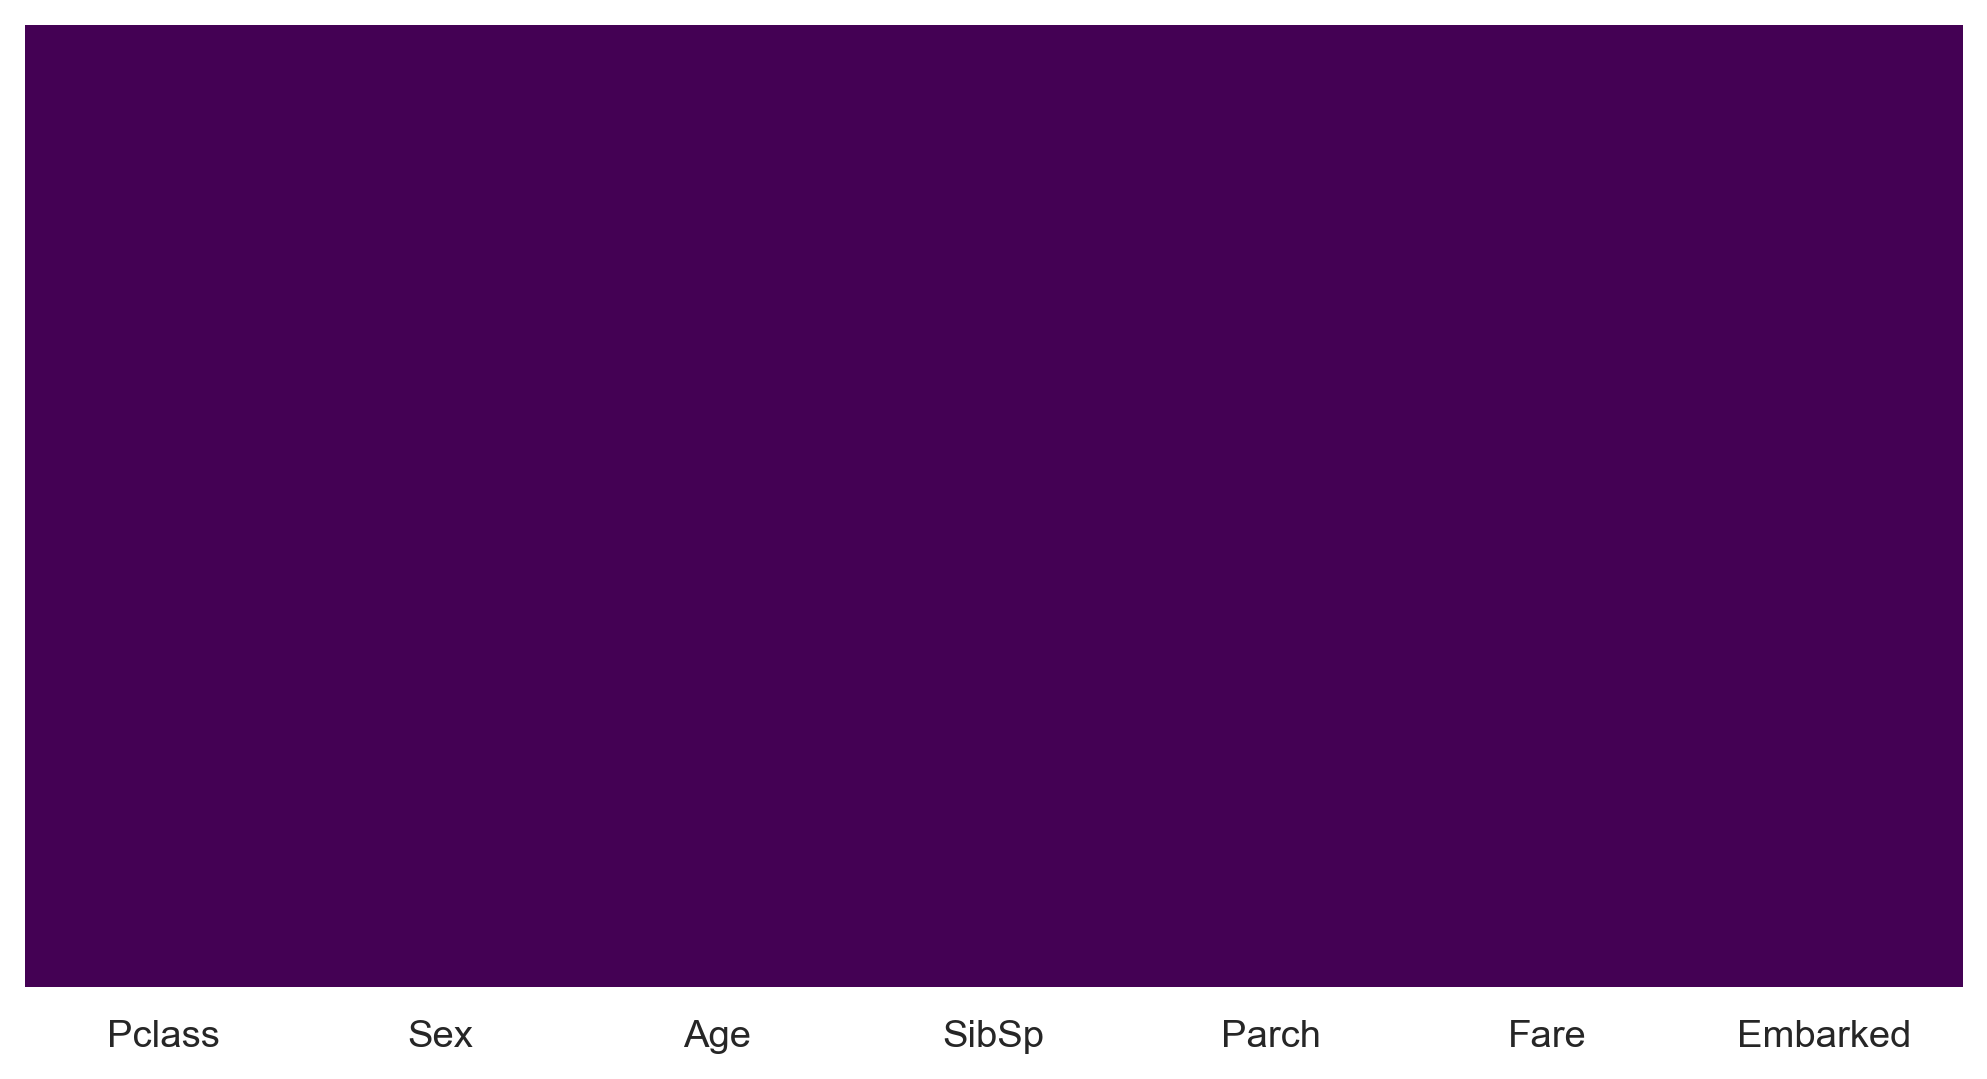

In [25]:
sns.heatmap(train_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')
sns.heatmap(test_df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

### Now the data is cleaned, now encode the categorical columns.

In [26]:
train_df = pd.get_dummies(data=train_df, columns=['Sex','Embarked'],drop_first= True, dtype=int)

In [27]:
train_df = train_df.drop(columns=['Embarked_C'])

In [28]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
test_df = pd.get_dummies(data=test_df, columns=['Sex','Embarked'],drop_first=True, dtype=int)

In [30]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# Model building

In [31]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
x = train_df.iloc[:,1:]
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [33]:
y = train_df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
lg = LogisticRegression() #Object/ Variable
training = lg.fit(x,y)

#### Predicting the values.

In [40]:
test=test_df.head()

In [41]:
# As the testing data do not have the target column, directly passing the testing dataset.
ypred =  lg.predict(test)
ypred

array([0, 0, 0, 0, 1], dtype=int64)

#### Here the model is complete using Logistic Regression but its evaluation cannot be done as the test data do not contain the target variable.

## Interview questions

### What is the difference between precision and recall?
1. Precision - Precision is the evaluation metrics for all the classification models.It is the count of out of total positive prediction how many are actually positive. Precision = TP/TP+FP.The precision can be measured on the scale of 0 to 1. The value close to 1 or 1 indicates the model is accurate, that is better in predicting the target variable.

2. Recall - Recall is also the evaluation metrics for all the classification models. It tells about the ability of the model to predict all positive classes correctly. Recall = TP/TP+FN.The recall can be measured on a scale of 0 to 1 or as a percentage. The higher the recall, the better. The perfect recall of 1.0 is achieved when the model can find all instances of the target class in the dataset.

 ### 2. What is cross-validation, and why is it important in binary classification?
 Cross validation - It is a technique used in machine learning to evaluate the performance of a model. It divides the available data into multiple folds or subsets, using one of these folds as a validation set, and trains the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. The results thus obtained from each validation step are averaged to produce a more robust estimate of the model’s performance. Cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.The main purpose of cross validation is to prevent overfiting.